In [160]:
from alpaca.data.historical import StockHistoricalDataClient, CryptoHistoricalDataClient
from alpaca.data.requests import StockBarsRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv('API_KEY')
secret_key = os.getenv('SECRET_KEY')

# no keys required for etf data
etf_client = StockHistoricalDataClient(api_key=api_key, secret_key=secret_key)
crypto_client = CryptoHistoricalDataClient(api_key=api_key, secret_key=secret_key)

# Request parameters for etf IBIT
etf_request_params = StockBarsRequest(
                        symbol_or_symbols='IBIT',
                        timeframe=TimeFrame.Minute,
                        start=datetime(2024, 10, 1),
                        end=datetime(2024, 12, 1)
                 )

# Request parameters for crypto BTC/USD
crypto_request_params = CryptoBarsRequest(
                        symbol_or_symbols='BTC/USD',
                        timeframe=TimeFrame.Minute,
                        start=datetime(2024, 10, 1),
                        end=datetime(2024, 12, 1)
                 )

# Get etf and crypto bars
etf_bars = etf_client.get_stock_bars(etf_request_params)
crypto_bars = crypto_client.get_crypto_bars(crypto_request_params)

# Convert to dataframes
etf_df = etf_bars.df.reset_index()
crypto_df = crypto_bars.df.reset_index()

In [161]:
import pandas as pd

crypto_df['timestamp'] = pd.to_datetime(crypto_df['timestamp'], utc=True)
etf_df['timestamp'] = pd.to_datetime(etf_df['timestamp'],utc=True)

In [162]:
df = crypto_df.merge(etf_df, on='timestamp', suffixes=['_crypto', '_etf'])

<Axes: >

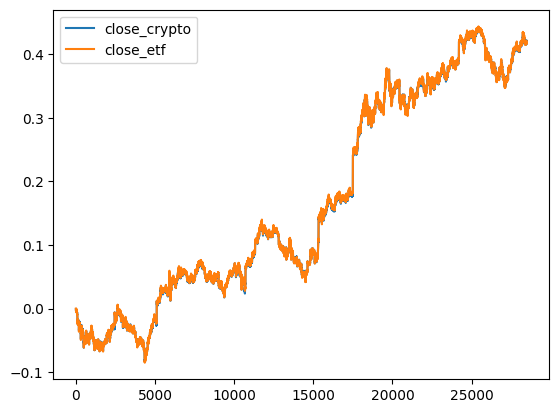

In [168]:
df[['close_crypto', 'close_etf']].map(np.log).diff().cumsum().plot()